In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,4)

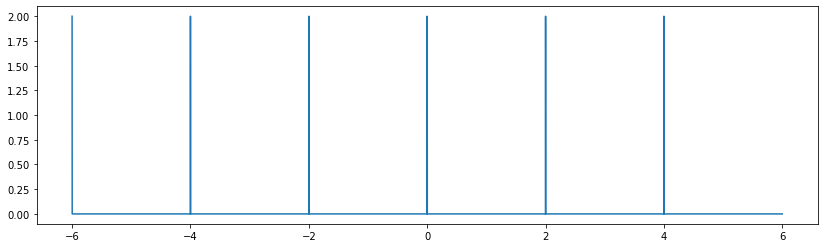

In [10]:
T = 2  # time distance between pulses
Fs = 1000  # sampling frequency, used for discretizing the system
t = np.arange(-6, 6, 1 / Fs)  # time range to consider
comb = np.zeros_like(t)
comb[:: int(Fs * T)] = T  # Comb becomes T every T*Fs samples
plt.plot(t, comb);

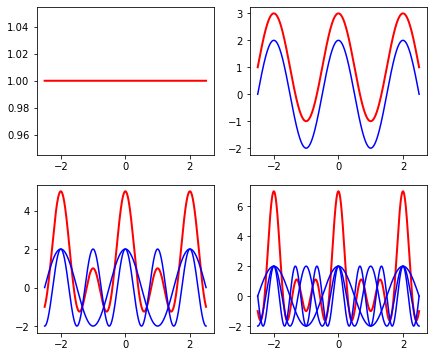

In [11]:
T = 2  # time-distance between diracs
Fs = 10000  # sampling frequency


def combApprox(N):
    t = np.arange(-2.5, 2.5, 1 / Fs)
    sigSum = np.ones_like(t)
    for n in range(1, N + 1):
        part = 2 * np.cos(2 * np.pi * n * t / T)
        sigSum = sigSum + part
        if n < 50:
            plt.plot(t, part, "b-")
    plt.plot(t, sigSum, "r-", lw=2, zorder=-1)


plt.figure(figsize=(7, 6))
plt.subplot(221)
combApprox(0)

plt.subplot(222)
combApprox(1)

plt.subplot(223)
combApprox(2)

plt.subplot(224)
combApprox(3)

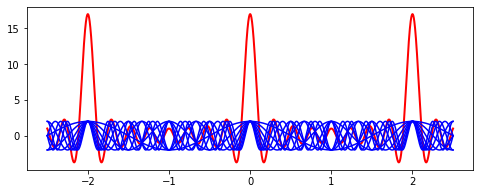

In [12]:
plt.figure(figsize=(8, 3))
combApprox(8)
plt.show()


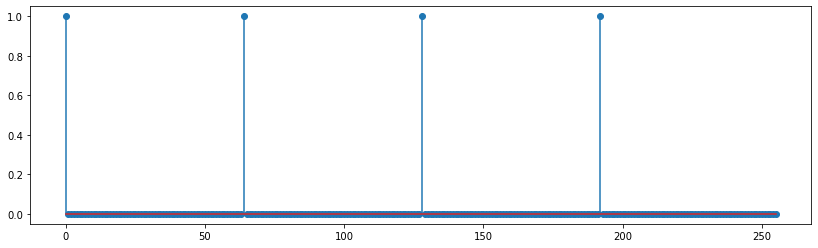

In [13]:
L = 256
K = 64
n = np.arange(L)
C_K = np.zeros(L)
C_K[::K] = 1
plt.stem(n, C_K);

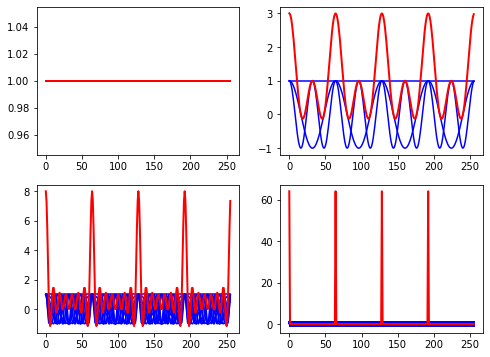

In [15]:
def combApprox_discrete(N, K, L):
    n = np.arange(L)
    sigSum = 0
    for k in range(N):
        part = np.exp(2j * np.pi * n * k / K)
        plt.plot(n, part.real, "b-")
        sigSum = sigSum + part
    plt.plot(n, sigSum.real, "r-", lw=2)


plt.figure(figsize=(8, 6))
plt.subplot(221)
combApprox_discrete(1, K, L)
plt.subplot(222)
combApprox_discrete(3, K, L)
plt.subplot(223)
combApprox_discrete(8, K, L)
plt.subplot(224)
combApprox_discrete(K, K, L)



The Fourier Transform of the comb function is still a comb function. 

时域间隔T，则频域间隔1/T

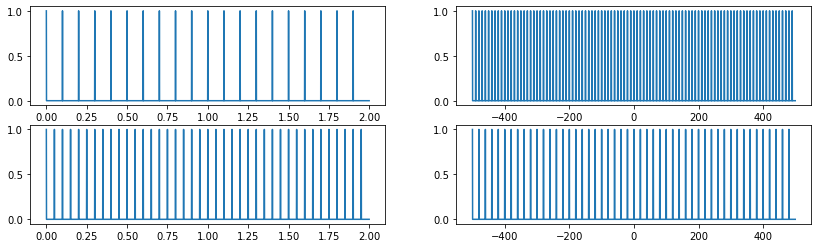

In [18]:
def comb(T):
    result = np.zeros(len(t))
    result[:: int(Fs * T)] = 1
    return result


def ft(x):
    """Calculate the Fourier transform of a given signal x"""
    return np.fft.fftshift(np.fft.fft(x)) * Fs / len(x)


Fs = 1000
t = np.arange(0, 2, 1 / Fs)
f = np.linspace(-Fs / 2, Fs / 2, len(t), endpoint=False)

T1 = 0.1
C_T1 = comb(T1)
T2 = 0.05
C_T2 = comb(T2)

plt.subplot(221)
plt.plot(t, C_T1)
plt.subplot(222)
plt.plot(f, abs(ft(C_T1) * T1))

plt.subplot(223)
plt.plot(t, C_T2)
plt.subplot(224)
plt.plot(f, abs(ft(C_T2) * T2))
plt.show()

